<a href="https://colab.research.google.com/github/GUILLENJV/SHM_AI/blob/master/63883c4716dc8b001ad85ee1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Version N° 1

La variable (y) se transformo en una variable dummy, asi mismo se utilizo como funcion de activacion la sofmax 

In [1]:
#learned embedding encoding for a neural network
from numpy import unique
import numpy
from numpy import array
import pandas as pd
import datetime 
from time import sleep
from tqdm import tqdm
import os
from pandas import read_csv
import json
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l1
from keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
#from predict import model 
from sklearn import preprocessing
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

X shape: :  (7003, 20)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                525       
                                                                 
 batch_normalization (BatchN  (None, 25)               100       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 10)                1

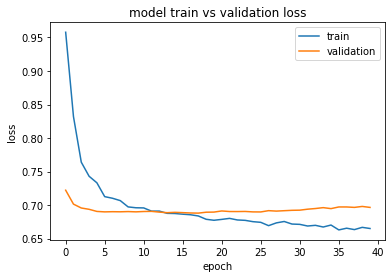

66/66 [==============================] - 0s 1ms/step


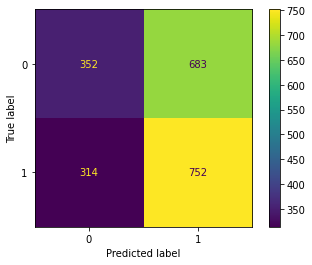

              precision    recall  f1-score   support

           0       0.53      0.34      0.41      1035
           1       0.52      0.71      0.60      1066

    accuracy                           0.53      2101
   macro avg       0.53      0.52      0.51      2101
weighted avg       0.53      0.53      0.51      2101



In [2]:
# carga los datos
df = pd.read_csv('63883c4716dc8b001ad85ee1.csv')

# Convertir los variables en string
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_tokens_adh"] = df["visitor_tokens_adh"].apply(str)
df["visitor_tokens_cadid"] = df["visitor_tokens_cadid"].apply(str)
df["converted_yes"] = df["converted_yes"].apply(str)
df["converted_no"] = df["converted_no"].apply(str)

# Eliminamos las variables que no van dentro del modelo
df = df.drop(['landing_pages_group_id','visitor_tokens_add', '_id'], axis=1)

# Eliminamos los valores duplicados
df = df.drop_duplicates()

# Imputamos la variable 
df['visitor_geo_location_countryCode'].fillna(df['visitor_geo_location_countryCode'].mode()[0], inplace=True)
df['visitor_geo_location_regionName'].fillna(df['visitor_geo_location_regionName'].mode()[0], inplace=True)
df['visitor_tokens_adi'].fillna(df['visitor_tokens_adi'].mode()[0], inplace=True)
df['visitor_geo_location_isp'].fillna(df['visitor_geo_location_isp'].mode()[0], inplace=True)
df['visitor_geo_location_connection_type'].fillna(df['visitor_geo_location_connection_type'].mode()[0], inplace=True)
df['visitor_geo_location_cityName'].fillna(df['visitor_geo_location_cityName'].mode()[0], inplace=True)

# Seleccionamos nuestras variables de entrda
X = df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no']]
# Covertimos laas variables en numpy
X = X.astype(str).to_numpy()
y = df[["landing_page_id"]].to_numpy()

# Aplicamos un encoder a las X
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OrdinalEncoder()
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)

# Aplicamos un encoder a y
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(label_encoded_y)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, dummy_y, test_size=0.30, random_state=123)

# Alicamos una trasformacion a nuestras vaiables
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Definición del modelo
def modelo_mlp(): 
    model = Sequential()
    model.add(Dense(25, input_dim=X_train.shape[1], 
                kernel_initializer= 'he_uniform',
                activation='relu', activity_regularizer=regularizers.l1(1e-4)))
    model.add(BatchNormalization())
    model.add(Dense(15, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(10, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())  
    model.add(Dense(2, kernel_initializer= 'he_uniform',
                activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    model.summary()
    return model

model = modelo_mlp()

# Entrenamos el modelo con el dataset
history=model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Obtenemos el accuaracy tanto para los datos de entrenamientos como los de prueba
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

# Obtenemos la curva de aprendizaje del modelo
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# Se obtiene la matriz de confusión
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
# Se obtiene las metricas de evaluación del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

In [3]:
# make class predictions with the model
predictions = (model.predict(X_test[1:2]))
predictions
# make class predictions with the model
predictions = (model.predict(X_test[1:2])).argmax(1)
predictions
print(label_encoder.inverse_transform(predictions))

1/1 [==============================] - 0s 19ms/step
['63881eb04c66c4001a1d0e56']


In [4]:
# Guardamos el modelo generado
from keras.models import load_model 
model.save("Version1_model_63883c4716dc8b001ad85ee1.h5") 
loaded_model = load_model("Version1_model_63883c4716dc8b001ad85ee1.h5")

# Version N° 2

La variable (y) no se transformo en una variable dummy, asi mismo se utilizo como funcion de activacion la sigmoid por tratarse de un modelo binario que es la manera correcta de trabajar con este tipo de datos 

X shape: :  (7003, 20)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                525       
                                                                 
 batch_normalization_3 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 15)                390       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (N

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
154/154 [==============================] - 2s 5ms/step - loss: 0.7853 - accuracy: 0.4955 - val_loss: 0.7205 - val_accuracy: 0.5031
Epoch 2/40
154/154 [==============================] - 1s 4ms/step - loss: 0.7303 - accuracy: 0.5190 - val_loss: 0.7089 - val_accuracy: 0.5079
Epoch 3/40
154/154 [==============================] - 1s 4ms/step - loss: 0.7157 - accuracy: 0.5151 - val_loss: 0.7029 - val_accuracy: 0.5250
Epoch 4/40
154/154 [==============================] - 1s 4ms/step - loss: 0.7060 - accuracy: 0.5216 - val_loss: 0.6980 - val_accuracy: 0.5250
Epoch 5/40
154/154 [==============================] - 1s 4ms/step - loss: 0.6982 - accuracy: 0.5349 - val_loss: 0.6967 - val_accuracy: 0.5221
Epoch 6/40
154/154 [==============================] - 1s 4ms/step - loss: 0.6944 - accuracy: 0.5257 - val_loss: 0.6946 - val_accuracy: 0.5350
Epoch 7/40
154/154 [==============================] - 1s 4ms/step - loss: 0.6918 - accuracy: 0.5367 - val_loss: 0.6957 - val_accuracy: 0.5274
Epoch 

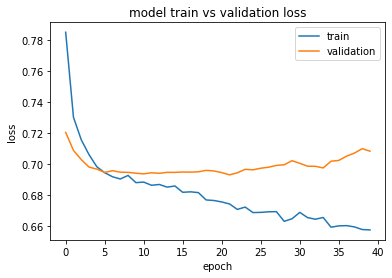

66/66 [==============================] - 0s 2ms/step
[[692 343]
 [665 401]]


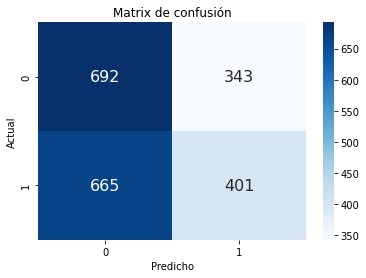

              precision    recall  f1-score   support

           0       0.51      0.67      0.58      1035
           1       0.54      0.38      0.44      1066

    accuracy                           0.52      2101
   macro avg       0.52      0.52      0.51      2101
weighted avg       0.52      0.52      0.51      2101



In [5]:
# carga los datos
df = pd.read_csv('63883c4716dc8b001ad85ee1.csv')

# Convertir los variables en string
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_tokens_adh"] = df["visitor_tokens_adh"].apply(str)
df["visitor_tokens_cadid"] = df["visitor_tokens_cadid"].apply(str)
df["converted_yes"] = df["converted_yes"].apply(str)
df["converted_no"] = df["converted_no"].apply(str)

# Eliminamos las variables que no van dentro del modelo
df = df.drop(['landing_pages_group_id','visitor_tokens_add', '_id'], axis=1)

# Eliminamos los valores duplicados
df = df.drop_duplicates()

# Imputamos la variable 
df['visitor_geo_location_countryCode'].fillna(df['visitor_geo_location_countryCode'].mode()[0], inplace=True)
df['visitor_geo_location_regionName'].fillna(df['visitor_geo_location_regionName'].mode()[0], inplace=True)
df['visitor_tokens_adi'].fillna(df['visitor_tokens_adi'].mode()[0], inplace=True)
df['visitor_geo_location_isp'].fillna(df['visitor_geo_location_isp'].mode()[0], inplace=True)
df['visitor_geo_location_connection_type'].fillna(df['visitor_geo_location_connection_type'].mode()[0], inplace=True)
df['visitor_geo_location_cityName'].fillna(df['visitor_geo_location_cityName'].mode()[0], inplace=True)

# Seleccionamos nuestras variables de entrda
X = df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no']]
# Covertimos laas variables en numpy
X = X.astype(str).to_numpy()
y = df[["landing_page_id"]].to_numpy()

# Aplicamos un encoder a las X
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OrdinalEncoder()
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)

# Aplicamos un encoder a y
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(label_encoded_y)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=0.30, random_state=123)

# Alicamos una trasformacion a nuestras vaiables
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Definición del modelo
def modelo_mlp(): 
    model = Sequential()
    model.add(Dense(25, input_dim=X_train.shape[1], 
                kernel_initializer= 'he_uniform',
                activation='relu', activity_regularizer=regularizers.l1(1e-4)))
    model.add(BatchNormalization())
    model.add(Dense(15, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(10, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())  
    model.add(Dense(1, kernel_initializer= 'he_uniform',
                activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    model.summary()
    return model

model = modelo_mlp()

# Entrenamos el modelo con el dataset
history=model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Obtenemos el accuaracy tanto para los datos de entrenamientos como los de prueba
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

# Obtenemos la curva de aprendizaje del modelo
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Matrix de confusión")
sns.heatmap(matrix,annot=True,cmap="Blues",fmt="d",cbar=True, 
            annot_kws={"size": 16})
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()

plt.show()
# Se obtiene las metricas de evaluación del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

In [6]:
label_encoded_y

array([0, 0, 1, ..., 0, 0, 1])

In [7]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.67      0.58      1035
           1       0.54      0.38      0.44      1066

    accuracy                           0.52      2101
   macro avg       0.52      0.52      0.51      2101
weighted avg       0.52      0.52      0.51      2101



In [8]:
# Guardamos el modelo generado
from keras.models import load_model 
model.save("Version2_model_63883c4716dc8b001ad85ee1.h5") 
loaded_model = load_model("Version2_model_63883c4716dc8b001ad85ee1.h5")